# Keras tutorial - Emotion Detection in Images of Faces


#### Why are we using Keras? 

* Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. 
* Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. 
* Being able to go from idea to result with the least possible delay is key to finding good models. 
* However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you would still implement in TensorFlow rather than in Keras. 
* That being said, Keras will work fine for many common models. 

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from utility import *

Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [3]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

In [4]:
# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [5]:
print('X_train Shape : ',X_train.shape)
print('Y_train Shape : ',Y_train.shape)
print('X_test Shape  : ',X_test.shape)
print('Y_test Shape  : ',Y_test.shape)

X_train Shape :  (600, 64, 64, 3)
Y_train Shape :  (600, 1)
X_test Shape  :  (150, 64, 64, 3)
Y_test Shape  :  (150, 1)


1


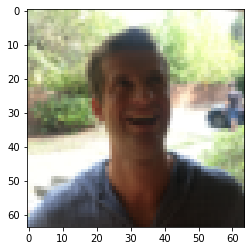

In [6]:
index = 3
plt.imshow(X_train_orig[index])
print(classes[int(Y_train[index])])

- Y = 0 ; not smiling
- Y = 1 ; smiling

## 2 - Building a model in Keras

In [7]:
def Happy_Model(input_shape):
    
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32,(7,7),strides=(1,1),name='conv0')(X)
    X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation('relu')(X)
    
    #MaxPool
    X = MaxPooling2D((2,2),name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    return model

You have now built a function to describe your model. To train and test this model, there are four steps in Keras:
1. Create the model by calling the function above  

2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`  

3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`  

4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`  

If you want to know more about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/models/model/).

### Create Model
- The `input_shape` parameter is a tuple (height, width, channels).  It excludes the batch number.  

In [8]:
happyModel = Happy_Model(X_train.shape[1:])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



### Compile The Model
- Optimizers you can try include `'adam'`, `'sgd'` or others.  See the documentation for [optimizers](https://keras.io/optimizers/)  
- The "happiness detection" is a binary classification problem.  The loss function that you can use is `'binary_crossentropy'`.  Note that `'categorical_cross_entropy'` won't work with your data set as its formatted, because the data is an array of 0 or 1 rather than two arrays (one for each category).  Documentation for [losses](https://keras.io/losses/)

In [9]:
happyModel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Train The Model

In [10]:
happyModel.fit(x = X_train,y = Y_train,epochs = 20 , batch_size=16)


Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 1.2254 - accuracy: 0.7033
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2608 - accuracy: 0.8983
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2774 - accuracy: 0.8900
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1609 - accuracy: 0.9350
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1504 - accuracy: 0.9517
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1449 - accuracy: 0.9483
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1335 - accuracy: 0.9483
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1004 - accuracy: 0.9733
Epoch 9/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0957 - accuracy: 0.9700
Epoch 10/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0748 - accuracy: 0.976

### Step 4: evaluate model 

In [11]:
predictions = happyModel.evaluate(x=X_test,y=Y_test)
print()
print(predictions)

150/150 [==============================] - 1s 3ms/step

[0.1361385746796926, 0.9599999785423279]


In [12]:
print('Loss     : ',predictions[0])
print('Accuracy : ',predictions[1])

Loss     :  0.1361385746796926
Accuracy :  0.9599999785423279
